In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
df=pd.read_csv('imported_datasets/plantgrowth.csv')

In [3]:
df.head

<bound method NDFrame.head of     rownames  weight group
0          1    4.17  ctrl
1          2    5.58  ctrl
2          3    5.18  ctrl
3          4    6.11  ctrl
4          5    4.50  ctrl
5          6    4.61  ctrl
6          7    5.17  ctrl
7          8    4.53  ctrl
8          9    5.33  ctrl
9         10    5.14  ctrl
10        11    4.81  trt1
11        12    4.17  trt1
12        13    4.41  trt1
13        14    3.59  trt1
14        15    5.87  trt1
15        16    3.83  trt1
16        17    6.03  trt1
17        18    4.89  trt1
18        19    4.32  trt1
19        20    4.69  trt1
20        21    6.31  trt2
21        22    5.12  trt2
22        23    5.54  trt2
23        24    5.50  trt2
24        25    5.37  trt2
25        26    5.29  trt2
26        27    4.92  trt2
27        28    6.15  trt2
28        29    5.80  trt2
29        30    5.26  trt2>

In [4]:
df.head(5)

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [5]:
df.tail()

,rownames,weight,group
25,26,5.29,trt2
26,27,4.92,trt2
27,28,6.15,trt2
28,29,5.80,trt2
29,30,5.26,trt2


In [6]:
df.describe()

,rownames,weight
count,30.000000,30.000000
mean,15.500000,5.073000
std,8.803408,0.701192
min,1.000000,3.590000
25%,8.250000,4.550000
50%,15.500000,5.155000
75%,22.750000,5.530000
max,30.000000,6.310000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  30 non-null     int64  
 1   weight    30 non-null     float64
 2   group     30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


In [31]:
df.dtypes

rownames      int64
weight      float64
group        object
dtype: object

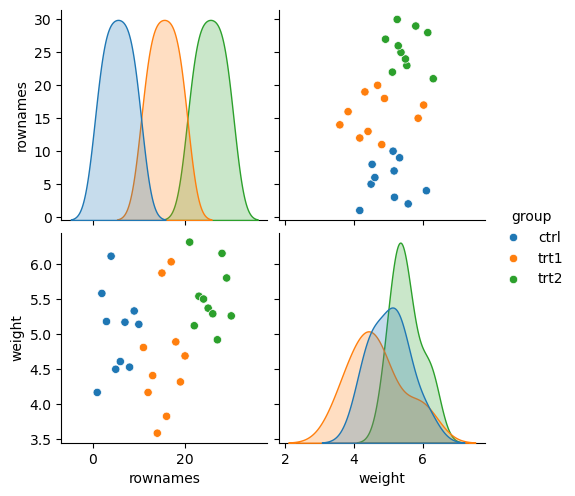

In [32]:
sns.pairplot(df, hue= 'group')
plt.show()

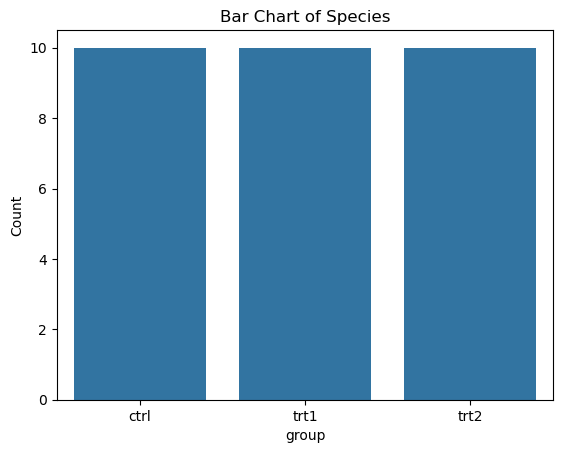

In [33]:
sns.countplot(x='group', data=df)
plt.title('Bar Chart of Species')
plt.xlabel('group')
plt.ylabel('Count')
#plt.legend
plt.show()


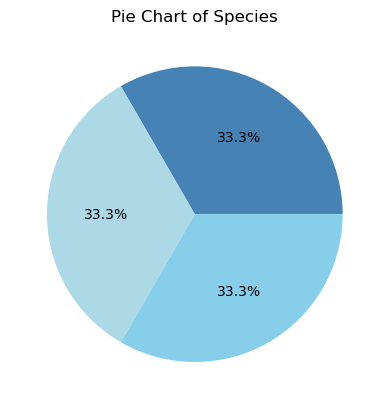

In [34]:
plt.pie(df['group'].value_counts(), colors=['steelblue', 'lightblue', 'skyblue'], autopct='%1.1f%%')
plt.title('Pie Chart of Species')
#plt.legend()
plt.show()

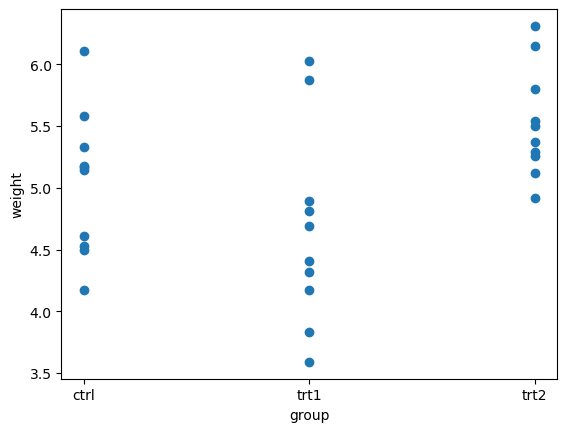

In [35]:
x =df['group']
y =df['weight']
plt.scatter(x, y)
plt.xlabel('group')
plt.ylabel('weight')
plt.show()

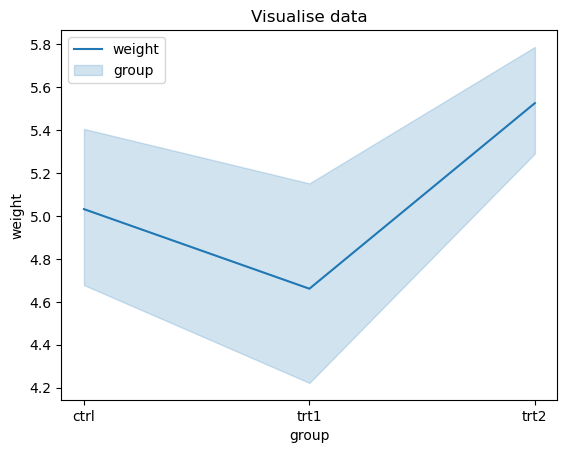

In [36]:
sns.lineplot(data=df, x = 'group', y = 'weight')
#abc
plt.title('Visualise data')
plt.xlabel('group')
plt.ylabel('weight')
plt.legend(['weight','group'])
plt.show()

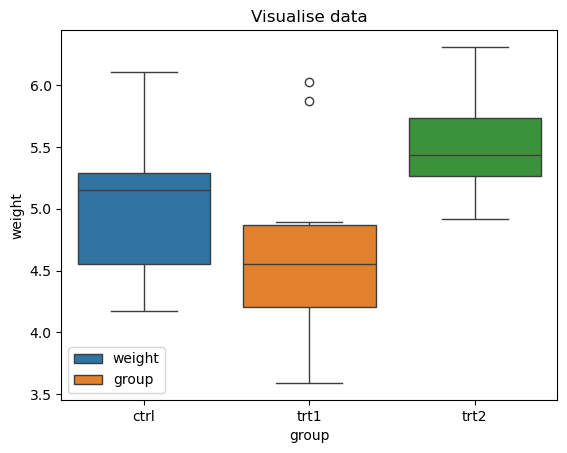

In [37]:
sns.boxplot(data=df, x = 'group', y = 'weight',hue="group" )
plt.title('Visualise data')
plt.xlabel('group')
plt.ylabel('weight')
plt.legend(['weight','group'])
plt.show()

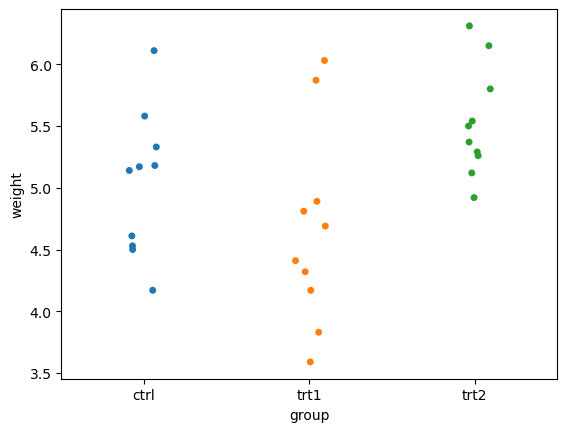

In [38]:
sns.stripplot(data=df, x = 'group', y = 'weight',hue="group" );

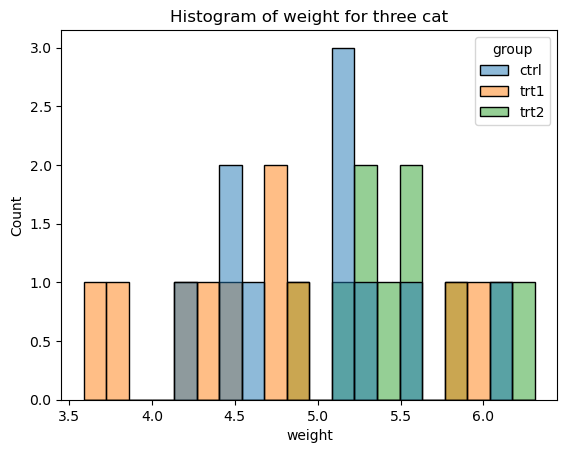

In [39]:
sns.histplot(data=df, x="weight", hue="group", bins=20)
plt.title("Histogram of weight for three cat")
plt.xlabel("weight")
plt.ylabel("Count")
#plt.legend
plt.show()

Describe what a t-test is, how it works, and what the assumptions are.
A t-test is a statistical test used to compare the means of two groups to determine if they are significantly different from each other. It is commonly used in hypothesis testing to assess whether the observed differences between groups are due to chance or if they reflect true differences in the population.

Assumptions of a t-test
Independence: The observations in each group must be independent of each other.
Normality: The data in each group should be approximately normally distributed.
Homogeneity of Variances: The variances of the two groups should be approximately equal.
Random Sampling: The data should be collected using a random sampling method.

How a t-test Works
Formulate Hypotheses:

Null Hypothesis ((H_0)): There is no difference between the means of the two groups.
Alternative Hypothesis ((H_a)): There is a difference between the means of the two groups.
Calculate the Test Statistic:

The t-test statistic is calculated using the difference between the group means, the standard deviations, and the sample sizes.
Determine the p-value:

The p-value indicates the probability of observing the data, or something more extreme, if the null hypothesis is true.
Compare the p-value to the Significance Level ((\alpha)):

If the p-value is less than (\alpha) (commonly 0.05), reject the null hypothesis.

#https://www.scribbr.com/statistics/t-test/
A t test is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another.

https://statisticsbyjim.com/hypothesis-testing/t-test/
A t test is a statistical hypothesis test that assesses sample means to draw conclusions about population means. Frequently, analysts use a t test to determine whether the population means for two groups are different. For example, it can determine whether the difference between the treatment and control group means is statistically significant.

A scale weighing the population means to represent a t test.There are three types of t tests. They all evaluate sample means using t-values, t-distributions, and degrees of freedom to calculate statistical significance. It is a parametric analysis that compares one or two group means.

The following are the standard t tests:

One-sample: Compares a sample mean to a reference value.
Two-sample: Compares two sample means.
Paired: Compares the means of matched pairs, such as before and after scores.


In [40]:
# code for t test

# Separate the data into two treatment groups: trt1 and trt2
trt1 = df[df.group == 'trt1']['weight']
trt2 = df[df.group == 'trt2']['weight']

# Perform a t-test to determine if there is a significant difference between the two treatment groups
t_stat, p_value = stats.ttest_ind(trt1, trt2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Check if the result is significant
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the two treatment groups (trt1 and trt2).")
else:
    print("There is no significant difference between the two treatment groups (trt1 and trt2).")

T-statistic: -3.0100985421243616
P-value: 0.0075184261182198574
There is a significant difference between the two treatment groups (trt1 and trt2).


In [41]:
stats.ttest_ind(trt1, trt2)

TtestResult(statistic=-3.0100985421243616, pvalue=0.0075184261182198574, df=18.0)

Complete the project in a single notebook called project.ipynb in your repository. The same style should be used as detailed above: explanations in MarkDown and code comments, clean code, and regular commits. Use plots as appropriate.

In this project, you will analyze the PlantGrowth R dataset. You will find a short description of it on Vicent Arel-Bundock's Rdatasets page. The dataset contains two main variables, a treatment group and the weight of plants within those groups.

Your task is to perform t-tests and ANOVA on this dataset while describing the dataset and explaining your work. In doing this you should:

Download and save the dataset to your repository.

Describe the data set in your notebook.

Describe what a t-test is, how it works, and what the assumptions are.

Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.

Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.

Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.

Describe what a t-test is, how it works, and what the assumptions are.

# ANOVA
Anova stands for Analysis of Variance,
helps determine if the weights of plants in control grouop and two treatment gropus are significantly different

In [42]:
# Perform ANOVA
anova_result = stats.f_oneway(df[df['group'] == 'ctrl']['weight'],
                              df[df['group'] == 'trt1']['weight'],
                              df[df['group'] == 'trt2']['weight'])

# Print the results
print(f"ANOVA result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

ANOVA result: F-statistic = 4.846087862380136, p-value = 0.0159099583256229


F-statistic = 4.846: This value represents the ratio of the variance between the groups to the variance within the groups. A higher F-statistic suggests that there is more variability between the group means than within the groups, which can indicate a significant difference between the groups.

#https://www.statology.org/anova-f-value-p-value/
The F-statistic is the ratio of the mean squares treatment to the mean squares error:

F-statistic: Mean Squares Treatment / Mean Squares Error

p-value = 0.0159: This value tells us the probability that the observed differences between the group means occurred by chance. In this case, the p-value is less than 0.05, which is a common threshold for statistical significance.

Interpretation:
Since the p-value is less than 0.05, we reject the null hypothesis. This means there is a statistically significant difference between the means of the three treatment groups (ctrl, trt1, and trt2). In other words, at least one of the treatment groups has a different mean weight compared to the others.